![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

In [5]:
#visualizar el texto de la primera fila completo
df.loc[16, 'comment_text']

'Great article, Thanks Globe and Mail.\n\nPLATO Testing has operations in New Brunswick and British Columbia, and we are exploring expansion into other provinces. The company has a training program and the technical infrastructure to make this work.  \n\nPLATO Testing is an opportunity to Canadian companies, crown corporations and governments to invest in the futures of Indigenous Canadians pursuing careers in Information Technology and the Knowledge Economy.  \n\nPLATO Testers are well trained and able to deliver professional and cost-competitive testing services right here in Canada.  A purchase decision with PLATO Testing helps to create a career and positively impact a life right here in Canada.  \n\nAll we need is your business!'

In [6]:
# ver los quee son mayores a 0.7 en target
textos = df[df['target'] > 0.7]['comment_text']
textos.iloc[199]

'Junior, your ignorance of basic supply and demand is profound. At least you were smart enough to delete your last post of babbling stupidity puking straw.'

<Axes: >

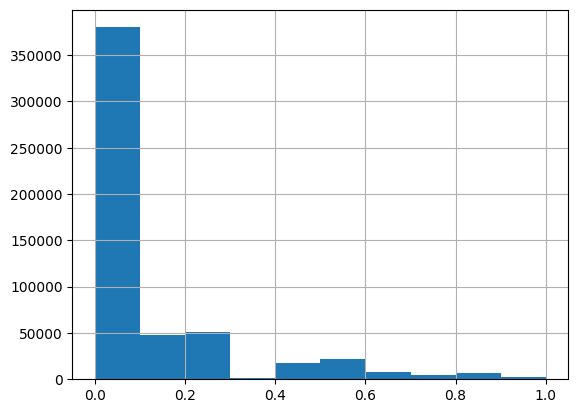

In [7]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [8]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [9]:
#Aplicamos función para eliminar los números que pudieramos encontrar en el texto, dado que no son relevantes para el ejercicio
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)
    return text
df['comment_text'] = df['comment_text'].apply(clean_text)

In [10]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
y_train

101388    0.0
187598    0.0
175087    0.0
521167    0.0
343059    0.0
         ... 
110268    0.2
259178    0.0
365838    0.0
131932    0.0
121958    0.0
Name: target, Length: 362779, dtype: float64

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 1
CV_1 = CountVectorizer(lowercase=True, stop_words='english', max_features=25000)

Se inició el CV con los parámetros:
- lowercase = True para garantizar que se pongan en minúscula todas las palabras y así garantizar homogeneridad en los datos
- stopwords usa un "diccionario" para eliminar el uso de palabras comunes en inglés por ejemplo is, the, and, que puedan aparecer mucho en el texto
- se usa max_features para indicar el número máximo de tokens a incluir, entre mayor el número más demora el tiempo de procesamiento, así que se decidió usar 25000, dado que con más la memoria generaba problemas de capacidad
- min_df = 3 aquí indicamos que el número de caracteres mínimos para tener en cuenta un feature es de 3, así filtramos aun más las palabras escogidas

In [14]:
#Se aplica en test y train
X_CV_Train = CV_1.fit_transform(X_train)
X_CV_Test = CV_1.fit_transform(X_test)

In [15]:
X_CV_Train.shape

(362779, 25000)

Para ver como estaría en un df los tokens

In [16]:
CV_1.vocabulary_

{'interesting': 11569,
 'sorry': 20790,
 'hear': 10126,
 'small': 20558,
 'business': 2935,
 'owner': 15754,
 'getting': 9303,
 'hit': 10359,
 'businesses': 2936,
 'rarity': 17967,
 'today': 22592,
 'world': 24707,
 'hope': 10508,
 'adequate': 283,
 'insurance': 11507,
 'help': 10202,
 'gallery': 9106,
 'going': 9448,
 'juneau': 12066,
 'smash': 20570,
 'grab': 9537,
 'jewelry': 11932,
 'store': 21365,
 'gold': 9451,
 'rings': 19028,
 'taken': 22027,
 'drug': 6848,
 'problem': 17257,
 'consideration': 4568,
 'motley': 14394,
 'thinking': 22407,
 'millions': 13975,
 'democrats': 5727,
 'guess': 9771,
 'having': 10072,
 'somewhat': 20760,
 'positive': 16875,
 'portrayal': 16856,
 'post': 16890,
 'fair': 8141,
 'prefer': 17052,
 'smear': 20573,
 'kick': 12239,
 'cat': 3273,
 'professor': 17307,
 'unlike': 23474,
 'detractors': 5991,
 'continually': 4685,
 'habitually': 9846,
 'comes': 4141,
 'reasoned': 18088,
 'logical': 13072,
 'simply': 20326,
 'based': 1819,
 'postings': 16899,
 'peop

In [17]:
X_CV_Train.shape

(362779, 25000)

In [18]:
y_train.shape

(362779,)

In [19]:
X_CV_Test.shape

(178683, 25000)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

GB = GradientBoostingRegressor()
GB.fit(X_CV_Train, y_train)

GradientBoostingRegressor()

In [21]:
predict_GB= GB.predict(X_CV_Test)

In [22]:
mse1 = mean_squared_error(y_test, predict_GB)
print("Mean Squared Error (MSE):", mse1)

Mean Squared Error (MSE): 0.037840312131913315


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Inicializar y entrenar modelos de Regresión Lineal y SVM
linear_model = LinearRegression()
linear_model.fit(X_CV_Train, y_train)




LinearRegression()

In [24]:
linear_preds = linear_model.predict(X_CV_Test)

In [25]:
linear_mse = mean_squared_error(y_test, linear_preds)

In [26]:
print("Regresión Lineal MSE:", linear_mse)

Regresión Lineal MSE: 0.062352368701845434


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [27]:
# Celda 2
CVT = CountVectorizer(ngram_range=(1, 4), lowercase=True, stop_words='english', max_features=25000 )


In [28]:
X_CVT_Train = CVT.fit_transform(X_train)
X_CVT_Test = CVT.transform(X_test)

In [29]:

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_CVT_Train, y_train)
predicciones_CVT = modelo_regresion.predict(X_CVT_Test)
mse = mean_squared_error(y_test, predicciones_CVT)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.023690720695580113


In [30]:
print(y_test)


356574    0.000000
471747    0.000000
118328    0.000000
142944    0.000000
496670    0.000000
            ...   
376523    0.575000
373742    0.200000
529081    0.000000
75381     0.000000
7056      0.166667
Name: target, Length: 178683, dtype: float64


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [31]:
#Celda 3


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [32]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer

TV = TfidfVectorizer()

In [33]:
X_TV_Train = TV.fit_transform(X_train)
X_TV_Test = TV.transform(X_test)

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_TV_Train, y_train)

LinearRegression()

In [35]:
y_pred = linear_model.predict(X_TV_Test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.027226328856213438


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [37]:
# Celda 5